In [8]:
import numpy as np
from tabulate import tabulate
import os
import sys
from scipy.io import savemat
from scipy.io import loadmat
from scipy.optimize import curve_fit

In [17]:
import pickle
import matplotlib.pyplot as plt 
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker
from matplotlib import font_manager 
font_manager.fontManager.addfont('../Arial.ttf')

In [19]:
num_cycles = 6 ;
num_samples = 40000 ;
num_per_run = 4000;
num_iter_collect = int(num_samples / num_per_run) ;

In [20]:
list_scaling_factor = [0.3, 0.4, 0.5, 0.75, 1.0] ;
code_list = ["./18_4_4", "./36_4_6", "./54_4_8", "./90_8_10", "./144_12_12" ] ;
code_list2 = ["[[18,4,4]]", "[[36,4,6]]", "[[54,4,8]]", "[[90,8,10]]", "[[144,12,12]]" ] ;

Z_total_logical_error = {}

for item in code_list: 

    for scaling_factor in list_scaling_factor:
        
        Z_total_logical_error[item+"_scaling_"+str( scaling_factor )] = 0 ;
        
        for iter_collect in range(num_iter_collect):
            
            fname = item + '/Numerical_results/' + 'Logical_Z_' + 'num_cycles_' + str(num_cycles) + '_scaling_' \
            + str(scaling_factor) +'_iterCollect_' + str(iter_collect) + '.mat' ;
            data = loadmat(fname) ;
            
            Z_total_logical_error[item+"_scaling_"+str( scaling_factor )] += data['logical_error_probability'][0][0];
        
        Z_total_logical_error[item+"_scaling_"+str( scaling_factor )] /= num_iter_collect ;

In [21]:
Z_logical_error_per_cycle = {
    key: 1 - (1 - value) ** (1 / num_cycles  )
    for key, value in Z_total_logical_error.items()
}

In [7]:
# Z_logical_error_per_cycle

In [22]:
X_total_logical_error = {}

for item in code_list: 

    for scaling_factor in list_scaling_factor:
        
        X_total_logical_error[item+"_scaling_"+str( scaling_factor )] = 0 ;
        
        for iter_collect in range(num_iter_collect):
            
            fname = item + '/Numerical_results/' + 'Logical_X_' + 'num_cycles_' + str(num_cycles) + '_scaling_' \
            + str(scaling_factor) +'_iterCollect_' + str(iter_collect) + '.mat' ;
            data = loadmat(fname) ;
            
            X_total_logical_error[item+"_scaling_"+str( scaling_factor )] += data['logical_error_probability'][0][0];
        
        X_total_logical_error[item+"_scaling_"+str( scaling_factor )] /= num_iter_collect ;

In [23]:
X_logical_error_per_cycle = {
    key: 1 - (1 - value) ** (1 / num_cycles  )
    for key, value in X_total_logical_error.items()
}

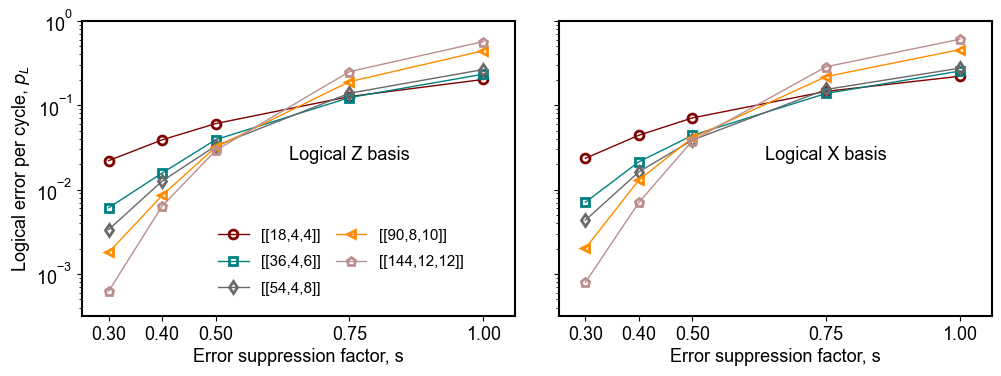

In [29]:
color_list = ["maroon", "teal", "dimGray", "#FF8C00", "#BC8F8F", "#7FFFAA"]
marker_list = [ "o", "s", "d", "<", "p", "H" ]

plt.rcParams['figure.figsize'] = 10, 3.6
plt.rcParams["font.family"] = "Arial"
plt.rcParams.update({'font.size': 13})
fontsize = 13 ;

fig, ax = plt.subplots(1, 2)
ax11, ax21= ax

spine_width = 1.5 ;
ax11.spines['top'].set_linewidth(spine_width)    
ax11.spines['bottom'].set_linewidth(spine_width) 
ax11.spines['left'].set_linewidth(spine_width)   
ax11.spines['right'].set_linewidth(spine_width)  
ax21.spines['top'].set_linewidth(spine_width)    
ax21.spines['bottom'].set_linewidth(spine_width) 
ax21.spines['left'].set_linewidth(spine_width)   
ax21.spines['right'].set_linewidth(spine_width)  

ax11.set_xlim(0.25, 1.06)
ax11.set_xticks([0.3, 0.4, 0.5, 0.75, 1])
ax11.set_ylim(10**(-3.5), 1.0)


for i, item in enumerate(code_list):
    temp = [Z_logical_error_per_cycle[item+"_scaling_"+str( scaling )] for scaling in list_scaling_factor ] ;
    ax11.plot( list_scaling_factor, temp, color = color_list[i], linestyle = "-", linewidth=1, 
        marker = marker_list[i],  markerfacecolor='none', markeredgewidth=2, markersize = 6.4, label = code_list2[i] )
#----------------------------------------------------------------------
ax11.legend(frameon=False, loc=(0.3, 0.05), ncol=2, columnspacing=1, labelspacing=0.8, fontsize=f'{11}')

ax11.set_xlabel('Error suppression factor, s', labelpad = 3) 
ax11.set_ylabel('Logical error per cycle, $p_{L}$', labelpad = 3) 
ax11.text(0.75, 0.02, "Logical Z basis", fontsize=f'{fontsize}', color='black', ha='center', va='bottom')
ax11.set_yscale("log")

##-----------------------------------------------------------------------------------------------
for i, item in enumerate(code_list):
    temp = [X_logical_error_per_cycle[item+"_scaling_"+str( scaling )] for scaling in list_scaling_factor ] ;
    ax21.plot( list_scaling_factor, temp, color = color_list[i], linestyle = "-", linewidth=1, 
        marker = marker_list[i], markerfacecolor='none', markeredgewidth=2, markersize = 6.4, label = item[2:] )
#----------------------------------------------------------------------

ax21.set_xlabel('Error suppression factor, s', labelpad = 3) 
# ax21.set_ylabel('$p_{L}$', labelpad = 3) 
ax21.text(0.75, 0.02, "Logical X basis", fontsize=f'{fontsize}', color='black', ha='center', va='bottom')

ax21.set_yscale("log")
ax21.set_xlim(0.25, 1.06)
ax21.set_ylim(10**(-3.5), 1.0)
ax21.yaxis.set_tick_params(labelleft=False)
ax21.set_xticks([0.3, 0.4, 0.5, 0.75, 1])

plt.subplots_adjust(left = 0.08, bottom = 0.14, top = 0.96, right = 0.99, hspace = 0.0, wspace = 0.1) 
plt.show()
fig.savefig('Logical_performance_prediction.pdf', format='pdf', facecolor='None')